## Business understanding

### Introduction
Imagine walking about 4 miles for a few litres of questionable water? Then imagine doing that on a daily basis basis. Such is the situation for about [24 million Tanzanians](https://lifewater.org/blog/tanzania-water-crisis-facts/). This water poverty has led to serious illnesses, high infant mortality, unproductive agricultural conditions and slumped economies.

In Tanzania, heterogeneous climate and geology contribute to significant seasonal, interannual, and geographic variability in water availability and water quality challenges. In addition, water supply challenges continues to become a huge issue due to meeting increased water demand associated with agricultural expansion and intensification and the need for improved access for domestic needs, including safe drinking water.Other key sectors fueling demand for surface and groundwater include  animal husbandry, hydropower,and mining, while environmental flow requirements are also generally high due to the significant coverage of key nature reserves.

Water being an essential need of life, the Government of Tanzania, Non Governmental Organizations, agencies and individuals have come up with waterwells to provide clean water for years. In rural areas, these water wells may be the only source of potable water and they are a lifeline for the inhabitants, but how effective are they? This project combines machine learning techniques with data visualization to point out potential causes of malfunctioning projects, identify possible success of potential projects, and redirect funds to the places where they are in dire need and can be spent most efficiently.
### Problem Statement
[About half of Tanzanians face water poverty](https://lifewater.org/blog/tanzania-water-crisis-facts/) and many waterpoints have been built to cater for the problem of water scarcity. However,these water points sometimes cease to function and therefore need an overhaul.

The government of Tanzania has tasked The Miner League  to identify wells that are functional ,those that need repairs and non functional wells. Identifying these wells provides a chance for the government to repair these wells that are faulty and properly manage  functional wells.The Miner League is to come up with a classification model to predict whether a well is functional,non functional or needing repairs.

### Project Justification
Aside from the lucky few who reside near the great lakes of Tanzania, [the majority whom are living under the $1.25 poverty line and lack access to basic water supply](https://nycdatascience.com/blog/student-works/linlin_cheng_proj_5/) have to trek for miles to access water, a cumbersome task that falls  to women and young girls, who should otherwise be in school. This leads to long term decrease of robustness in the future generations.

Further, [most of this water is contaminated causing many waterborne diseases](https://lifewater.org/blog/tanzania-water-crisis-facts/) that then cause high mortality among the population. With all this in mind, the Government of Tanzania aims to provide easily accessible water to the population and ensure that the technologies used are well maintained for long term use

### Objectives

- To predict the condition of a waterpoint pump based on the geographical location
- To predict the condition of a waterpoint pump based on age
- To predict the duration a water pump is likely to last depending on water quality
- To find patterns in non-functional waterpoint to influence how new waterpoints are built
- To identify waterpoints needing repair
- To identify which installer results in the most nonfunctional waterpoints pumps
- To identify effect of waterquality on water pumps
- To identify how the extraction type affects water pumps
- To identify how the age of the waterpump affects the functionality


### Business success criteria

The Ministry of Water under the Government of Tanzania will use our model to:
- identify geographical locations where a pump is likely to fail
- successfully show how water quality affects pumping used
- improve maintenance operations in functioning waterpoints


### Project success criteria

- Accuracy Score : 70%
- Precision Score : 80%
- Recall Score : 75%
- F1 Score : 79%

## Data understanding

#### Data description

In [18]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Viewing the Tanzania dataset
import pandas as pd 
data=pd.read_csv('Miner League Data/Train_set_values.csv')
data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [20]:
data.tail()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
59399,26348,0.0,2011-03-23,World Bank,191,World,38.104048,-6.747464,Kwa Mzee Lugawa,0,...,on failure,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [25]:
#Reading data that shows the status group of a waterpoint pump
data2=pd.read_csv('Miner League Data/Train_set_labels.csv')
data2.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [26]:
data2.tail()

,id,status_group
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional
59399,26348,functional


In [27]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


In [28]:
data2.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [29]:
# Merging data and data2 into one dataframe
main_df=data.join(data2.set_index('id'),on='id')
main_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [30]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [41]:
main_df.water_quality.value_counts()

soft                  42667
salty                  3718
unknown                 880
coloured                320
milky                   299
salty abandoned         231
fluoride                160
fluoride abandoned       13
Name: water_quality, dtype: int64

In [43]:
main_df.quantity.value_counts()

enough          28355
insufficient    11799
dry              4945
seasonal         2899
unknown           290
Name: quantity, dtype: int64

the funder,permit,public meeting,scheme name,scheme management,subvillage,installer columns have missing values

## Data preparation

### Dealing with duplicates

In [31]:
main_df.duplicated().sum()

0

There are no duplicates in the data

### Dealing with missing values

In [32]:
def missing_values(data):
    """
    Identify the missing values and their percentages
    Drop values that have no missing values
    Return only dara with missing values
    """
    miss_val = data.isna().sum().sort_values(ascending = False)
    percentage = (data.isna().sum() / len(data)).sort_values(ascending = False)
    missing_values = pd.DataFrame({"Missing Values": miss_val, "In Percentage": percentage})
    missing_values.drop(missing_values[missing_values["In Percentage"] == 0].index, inplace=True)
    return missing_values

In [33]:
missing_values(main_df)

,Missing Values,In Percentage
scheme_name,28166,0.474175
scheme_management,3877,0.065269
installer,3655,0.061532
funder,3635,0.061195
public_meeting,3334,0.056128
permit,3056,0.051448
subvillage,371,0.006246


In [34]:
#Dropping the scheme_name column
main_df.drop('scheme_name',axis=1,inplace=True)

In [35]:
main_df=main_df.dropna()
main_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,...,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,...,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional


In [36]:
missing_values(main_df)

,Missing Values,In Percentage


In [37]:
main_df.describe()


,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,48288.000000,48288.000000,48288.000000,48288.000000,4.828800e+04,48288.000000,48288.000000,48288.000000,48288.000000,48288.000000
mean,37138.591203,360.417379,701.494429,34.213824,-5.700627e+00,0.552145,14.794110,5.754618,176.683048,1342.774747
std,21437.666601,2828.437040,698.811196,6.329288,2.870772e+00,13.291202,17.235444,9.701979,472.505399,937.146464
min,2.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18578.750000,0.000000,0.000000,33.039487,-8.251540e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37093.500000,0.000000,463.000000,35.212593,-4.986570e+00,0.000000,12.000000,3.000000,30.000000,1987.000000
75%,55666.250000,50.000000,1335.000000,37.355583,-3.334879e+00,0.000000,17.000000,5.000000,200.000000,2005.000000
max,74247.000000,250000.000000,2770.000000,40.323402,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


### Dealing with outliers

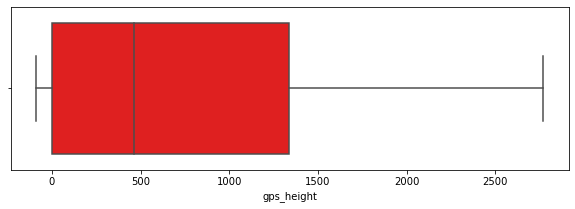

In [38]:
#checking for outliers
fig,ax=plt.subplots(figsize=(10,3))
sns.boxplot(x='gps_height',data=main_df,color='red')
plt.title('')
plt.show()

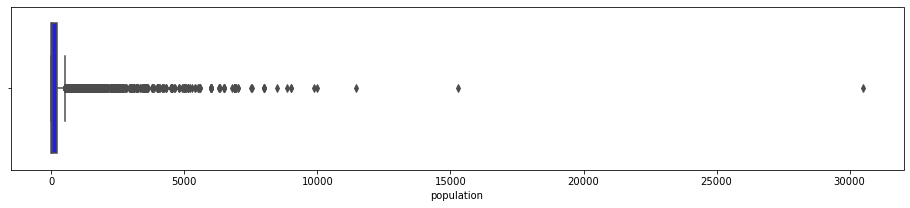

In [39]:
plt.subplots(figsize=(16,3))
sns.boxplot(x='population',data=main_df,color='blue');


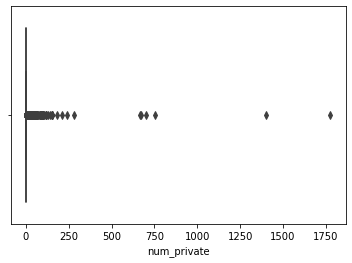

In [40]:
sns.boxplot(x='num_private',data=main_df);